[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/da-python/python-for-data-analytics/blob/main/Lesson2/hometask/HH-api-hometask.ipynb)

# Задание
* Скачать все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, а также captcha подумайте как их можно обойти)
* Извлеките все описания этих вакансий
* Создайте DataFrame  добавьте поле skills
* Переведите даты публикаций в datetime
* Постройте график опубликованных вакансий по датам
* Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
* Найдите те вакансии с использованием python, которые вам интересны
* Определите по полю skills какие навыки больше всего востребованы для этих вакансий
* Постройте график наиболее востребованных навыков для аналитика данных

Касательно ограничений в hh api прочитал много информации, по большей части ругаются в поддержке, в подсказках на гите информации полезной не нашел, с хабра некоторые ребята делают циклом, но есть риск бана ip со стороны hh.ru, либо предлагается купить платный функционал хх. Буду очень благодарен за предоставление обратной связи по данному вопросу и разъяснению как правильно было бы сделать. Спасибо!

https://github.com/hhru/api

In [29]:
import requests
from tqdm.auto import tqdm
import pandas as pd

In [30]:
sber = '3529'
page = 1
num_per_page = 100
area = 113
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={113}'

In [31]:
url = f'https://api.hh.ru/vacancies'
params = {
    'employer_id':sber,
    'page':page,
    'per_page':num_per_page,
    'area':area,
}
res = requests.get(url, params=params)

In [32]:
res.json()

{'alternate_url': 'https://hh.ru/search/vacancy?area=113&control_flag=vacancyBlacklistJoinEnabled%3ATrue&employer_id=3529&enable_snippets=true&items_on_page=100&page=1',
 'arguments': None,
 'clusters': None,
 'found': 3982,
 'items': [{'accept_temporary': False,
   'address': None,
   'adv_response_url': 'https://api.hh.ru/vacancies/67540818/adv_response?host=hh.ru',
   'alternate_url': 'https://hh.ru/vacancy/67540818',
   'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=67540818',
   'archived': False,
   'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
   'contacts': None,
   'created_at': '2022-07-06T14:06:19+0300',
   'department': {'id': '3529-3529-prof', 'name': 'Сбер для экспертов'},
   'employer': {'alternate_url': 'https://hh.ru/employer/3529',
    'id': '3529',
    'logo_urls': {'240': 'https://hhcdn.ru/employer-logo/3914324.jpeg',
     '90': 'https://hhcdn.ru/employer-logo/3914323.jpeg',
     'original': 'https://hhcdn.ru/

In [33]:
res = requests.get(url)

In [34]:
print(res)

<Response [200]>


In [35]:
vacancies = res.json()
num_pages = vacancies.get('pages')
num_pages

100

In [36]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [37]:
vacancies.get('items')[5]

{'accept_temporary': False,
 'address': {'building': '22с1',
  'city': 'Москва',
  'description': None,
  'id': '6056918',
  'lat': 55.737811,
  'lng': 37.660575,
  'metro': {'lat': 55.740746,
   'line_id': '8',
   'line_name': 'Калининская',
   'lng': 37.65604,
   'station_id': '8.78',
   'station_name': 'Марксистская'},
  'metro_stations': [{'lat': 55.740746,
    'line_id': '8',
    'line_name': 'Калининская',
    'lng': 37.65604,
    'station_id': '8.78',
    'station_name': 'Марксистская'},
   {'lat': 55.742396,
    'line_id': '5',
    'line_name': 'Кольцевая',
    'lng': 37.653334,
    'station_id': '5.76',
    'station_name': 'Таганская'},
   {'lat': 55.739502,
    'line_id': '7',
    'line_name': 'Таганско-Краснопресненская',
    'lng': 37.653605,
    'station_id': '7.77',
    'station_name': 'Таганская'}],
  'raw': 'Москва, Марксистская улица, 22с1',
  'street': 'Марксистская улица'},
 'adv_response_url': 'https://api.hh.ru/vacancies/68259330/adv_response?host=hh.ru',
 'alterna

In [38]:
v = vacancies.get('items')

In [ ]:
# v[0].get('')

In [39]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [40]:
vacancies = res.json()
num_pages = vacancies.get('pages')
vacancy_ids = [el.get('id') for el in vacancies.get('items')]

In [41]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [42]:
vnum  = vacancies.get('pages')

In [43]:
all_vacancy_ids= []
for i in tqdm(range(vnum)):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&area={area}'
    res = requests.get(url)
    vacancies = res.json()
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)

  0%|          | 0/100 [00:00<?, ?it/s]

TypeError: ignored

In [44]:
len(all_vacancy_ids)

2000

In [45]:
vacs = []
for vac_id in tqdm(all_vacancy_ids):
    url = f'https://api.hh.ru/vacancies/{vac_id}'
    res = requests.get(url)
    vacs.append(res.json())

  0%|          | 0/2000 [00:00<?, ?it/s]

In [46]:
res = requests.get(url)

In [47]:
res.json().keys()

dict_keys(['id', 'premium', 'billing_type', 'relations', 'name', 'insider_interview', 'response_letter_required', 'area', 'salary', 'type', 'address', 'allow_messages', 'experience', 'schedule', 'employment', 'department', 'contacts', 'description', 'branded_description', 'vacancy_constructor_template', 'key_skills', 'accept_handicapped', 'accept_kids', 'archived', 'response_url', 'specializations', 'professional_roles', 'code', 'hidden', 'quick_responses_allowed', 'driver_license_types', 'accept_incomplete_resumes', 'employer', 'published_at', 'created_at', 'initial_created_at', 'negotiations_url', 'suitable_resumes_url', 'apply_alternate_url', 'has_test', 'test', 'alternate_url', 'working_days', 'working_time_intervals', 'working_time_modes', 'accept_temporary', 'languages'])

In [48]:
res.json().get('key_skills')

[]

In [ ]:
[{'name':'SQL'},{'name':'Python'},{'name':'Git'}]

In [ ]:
[x.get('name') for x in [{'name':'SQL'},{'name':'Python'},{'name':'Git'}]]

['SQL', 'Python', 'Git']

In [82]:
vacs[121]

{'accept_handicapped': False,
 'accept_incomplete_resumes': False,
 'accept_kids': False,
 'accept_temporary': False,
 'address': {'building': None,
  'city': 'Москва',
  'description': None,
  'lat': 55.753215,
  'lng': 37.622504,
  'metro': None,
  'metro_stations': [],
  'raw': 'Москва',
  'street': None},
 'allow_messages': True,
 'alternate_url': 'https://hh.ru/vacancy/68125720',
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=68125720',
 'archived': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'billing_type': {'id': 'standard', 'name': 'Стандарт'},
 'branded_description': '\n<style>\n.swiper-container {\n    margin: 0 auto;\n    position: relative;\n    overflow: hidden;\n    list-style: none;\n    padding: 0;\n    z-index: 1;\n}\n\n.swiper-container-no-flexbox .swiper-slide {\n    float: left;\n}\n\n.swiper-container-vertical>.swiper-wrapper {\n    -webkit-box-orient: vertical;\n    -webkit-box-direction: normal;

In [116]:
df = pd.json_normalize(vacs)

In [117]:
df.head()

,id,premium,relations,name,insider_interview,response_letter_required,allow_messages,contacts,description,branded_description,...,address,department,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,salary,immediate_redirect_url
0,43756725,False,[],Специалист контактного центра,None,False,True,None,"<p>Сбер — это более 60 компаний экосистемы, 14...","\n<style>\n.tmpl_hh_wrapper p,\n.tmpl_hh_wrapp...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55415805,False,[],Менеджер по работе с клиентами,None,False,True,None,<p>Сбер — лучший работодатель России. У нас бо...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68202144,False,[],Стажер-тестировщик,None,False,True,None,<p> </p> <p><strong>Описание</strong><br />Мы ...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,67438948,False,[],Специалист по работе с обращениями клиентов,None,False,True,None,<p>Сбер — лучший работодатель России. У нас бо...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,67821535,False,[],Старший клиентский менеджер,None,False,True,None,<p>Сбер — лучший работодатель России. У нас бо...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
# Переведите даты публикаций в datetime
df['published_at'] = pd.to_datetime(df['published_at'])

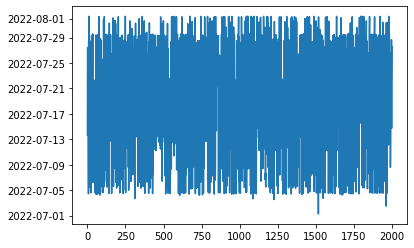

In [119]:
#Постройте график опубликованных вакансий по датам
df['published_at'].plot()

In [120]:
#Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
df['published_at'] = df['published_at'].dt.dayofweek

In [121]:
#По полученным данным - в понедельник (значение 0) публикуется больше всего вакансий, на втором месте пятница (значение 4)
df['published_at'].value_counts()

0    487
4    417
3    369
1    334
2    302
6     63
5     28
Name: published_at, dtype: int64

In [122]:
#Найдите те вакансии с использованием python, которые вам интересны
df1 = df[df['name'] == 'Аналитик данных']
df1.head()

,id,premium,relations,name,insider_interview,response_letter_required,allow_messages,contacts,description,branded_description,...,address,department,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,salary,immediate_redirect_url
121,68125720,False,[],Аналитик данных,None,False,True,None,<p>В SberData мы создаем централизованное хран...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
559,68324786,False,[],Аналитик данных,None,False,False,None,<p>Проект занимается построением крупнейшего в...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
759,67993764,False,[],Аналитик данных,None,False,False,None,<p><strong>Обязанности</strong></p> <ul> <li>П...,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
#Определите по полю skills какие навыки больше всего востребованы для этих вакансий. 
#У 2 вакансий скиллы отсутствуют, у вакансии с id 121 скиллы представлены в виде словаря, выделить уникальные значения у меня не получилось :(
df1.key_skills

121    [{'name': 'Python'}, {'name': 'SCALA'}, {'name...
559                                                   []
759                                                   []
Name: key_skills, dtype: object